## Task 1

### 1. Mathematical Foundations

We define the hypothesis function:

$$
h(x) = \frac{1}{1 + e^{-\theta \cdot x_i}}
$$

Class probabilities are:

$$
P(y_i = \text{Malignant} \mid x_i; \Theta) = h(x) = \frac{1}{1 + e^{-\Theta \cdot x_i}}
$$

$$
P(y_i = \text{Benign} \mid x_i; \Theta) = 1 - h(x)
$$

The likelihood of observing $y_i$ given $x_i$ is:

$$
P(y_i \mid x_i; \Theta) = \prod_{k=1}^{y_i} h(x)^k \cdot (1 - h(x))^{1 - k}
$$

The log-likelihood becomes:

$$
\log P(y_i \mid x_i; \Theta) = \sum_{k=1}^{y_i} \left[ \log(h(x)^k) + \log((1 - h(x))^{1 - k}) \right]
$$

Maximum Likelihood Estimation (MLE) is given by:

$$
\text{MLE} = \sum_{k=1}^{y_i} \left[ k \cdot \log(h(x)) + (1 - k) \cdot \log(1 - h(x)) \right]
$$

The Negative Log-Likelihood (NLL), which we minimize during training, is:

$$
\text{NLL} = -\sum_{k=1}^{y_i} \left[ k \cdot \log(h(x)) + (1 - k) \cdot \log(1 - h(x)) \right]
$$

The **MAP (Maximum A Posteriori)** technique for logistic regression is used to find the set of parameters $\Theta$ that maximizes the **posterior distribution**. In contrast, **MLE (Maximum Likelihood Estimation)** maximizes the likelihood alone, ignoring prior distributions. MLE fits the model solely to the observed data, without incorporating prior beliefs.

---

### 2. Dataset Description and Justification

The dataset I selected is a cancer dataset containing information about tumors in patients, classified as either **Benign** or **Malignant**. Features in the dataset include:

- Texture  
- Size  
- Smoothness  
- Symmetry  
- And other cell characteristics

My objective is to predict whether a tumor is **Malignant** using **Logistic Regression**.

Logistic Regression is the most appropriate model for this problem because:

- It is designed for **binary classification** (0 or 1).
- It outputs probabilities, which are interpretable and thresholdable.
- In contrast, Linear Regression:
  - Can output values outside the range $[0, 1]$.
  - Does not naturally model class probabilities.
  - Is not ideal for classification tasks like this.

---

### 3. Dataset Correspondence to Variables

Whether or not the tumour is Benign or Malignant is my $y_i$ and the features of the tumour will be the $x_i$. Some assumptions that would be made are that all features should be measured in some real value and all outputs should be either a 0 or a 1, 0 representing Benign and 1 representing Malignant.

---








In [2]:
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, make_scorer, precision_score, recall_score, f1_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

### Task 2

### 1. Data Set

https://www.kaggle.com/datasets/erdemtaha/cancer-data?resource=download

### 2. Exploratory Data Analysis

When looking at the data, there are a few key details that need to be addressed.


1. When viewing the data, there appears to be a column called "Unnamed: 32" which doesn't hold any information to it. Also the column called "id" does not hold any significance to the data.

In [3]:
#Removing id and Unnamed: 32 from data set
data = pd.read_csv("Cancer_Data.csv")

data.drop(["id", "Unnamed: 32"], axis=1, inplace=True)
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

2. I also changed the diagnosis data to instead represent 1's and 0's. 1's being Malignant tumours and 0's representing Benign tumours.

In [4]:
data['diagnosis'] = data['diagnosis'].replace({'M': 1, 'B': 0})
data.head()

<ipython-input-4-81d4e7e06470>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['diagnosis'] = data['diagnosis'].replace({'M': 1, 'B': 0})


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

There is also some multicollinearity that needs to be addressed. First I need to scale my data so that I can compare them to each other using variance inflation factor.

In [5]:
categorical_col = 'diagnosis'

numeric_cols = data.drop(columns=[categorical_col]).columns
cat_data = data[categorical_col] # Extract the categorical column separately

scalar = StandardScaler()
scaled_data = scalar.fit_transform(data[numeric_cols]) # Scale the numeric features

df = pd.DataFrame(scaled_data, columns=numeric_cols) # Create DataFrame with scaled features
df[categorical_col] = cat_data.values #Add the categorical column back

print(df)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       1.097064     -2.073335        1.269934   0.984375         1.568466   
1       1.829821     -0.353632        1.685955   1.908708        -0.826962   
2       1.579888      0.456187        1.566503   1.558884         0.942210   
3      -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4       1.750297     -1.151816        1.776573   1.826229         0.280372   
..           ...           ...             ...        ...              ...   
564     2.110995      0.721473        2.060786   2.343856         1.041842   
565     1.704854      2.085134        1.615931   1.723842         0.102458   
566     0.702284      2.045574        0.672676   0.577953        -0.840484   
567     1.838341      2.336457        1.982524   1.735218         1.525767   
568    -1.808401      1.221792       -1.814389  -1.347789        -3.112085   

     compactness_mean  concavity_mean  concave points_mean  sym

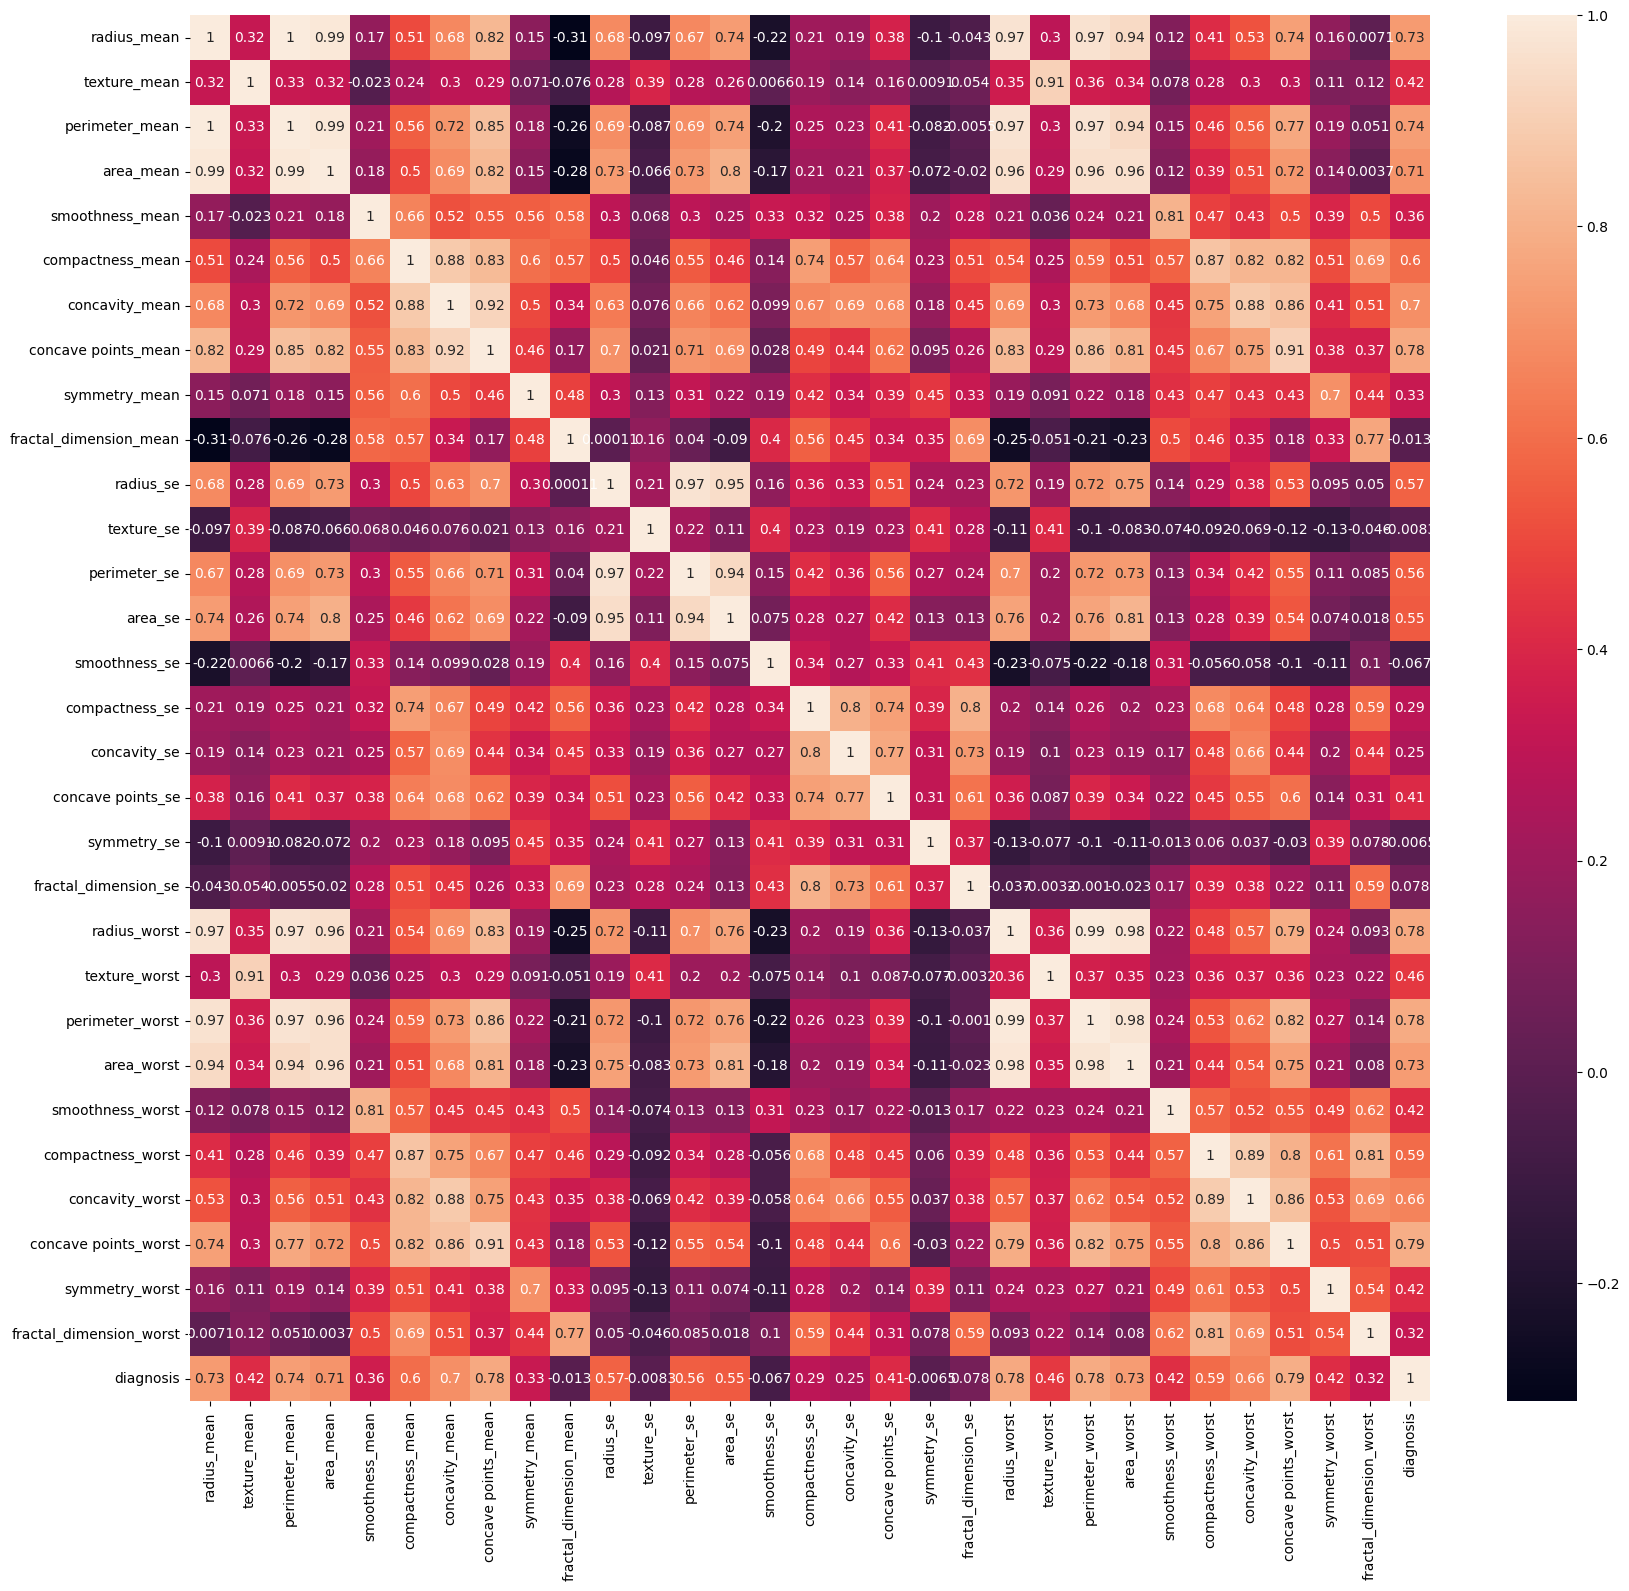

In [6]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [7]:
vif = pd.DataFrame()
vif["features"] = df.columns # Assign feature names
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])] # Compute VIF for each feature
vif.round(2)
print(vif)

                   features   VIF Factor
0               radius_mean  3809.184240
1              texture_mean    11.886040
2            perimeter_mean  3788.134356
3                 area_mean   347.943847
4           smoothness_mean     8.194290
5          compactness_mean    50.764241
6            concavity_mean    70.832441
7       concave points_mean    60.077724
8             symmetry_mean     4.220698
9    fractal_dimension_mean    15.756978
10                radius_se    75.537838
11               texture_se     4.205496
12             perimeter_se    70.370498
13                  area_se    41.172282
14            smoothness_se     4.039730
15           compactness_se    15.366331
16             concavity_se    15.755193
17        concave points_se    11.542952
18              symmetry_se     5.176451
19     fractal_dimension_se     9.719850
20             radius_worst   803.743215
21            texture_worst    18.580056
22          perimeter_worst   405.058223
23              

By testing using the variation inflation factor, we could deduce that the perimeter_mean, radius_mean, radius_se, perimeter_se, radius_worst, perimeter_worst, concavity_mean, concave points_worst, area_mean, compactness_worst, and concavity_worst are highly correlated to other categories.

In [8]:
df.drop(["perimeter_mean", "radius_mean", "radius_se", "perimeter_se", "radius_worst", "perimeter_worst", "concavity_mean", "concave points_worst", "area_mean", "compactness_worst", "concavity_worst", "texture_worst", "compactness_mean", "area_worst"], axis=1, inplace=True)

vif = pd.DataFrame()
vif["features"] = df.columns
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif.round(2)
print(vif)

                   features  VIF Factor
0              texture_mean    1.704253
1           smoothness_mean    6.465619
2       concave points_mean    5.643352
3             symmetry_mean    3.565652
4    fractal_dimension_mean    6.865969
5                texture_se    1.992416
6                   area_se    2.472218
7             smoothness_se    3.230264
8            compactness_se    5.877687
9              concavity_se    3.959435
10        concave points_se    4.297926
11              symmetry_se    4.045823
12     fractal_dimension_se    5.535868
13         smoothness_worst    8.304273
14           symmetry_worst    7.054910
15  fractal_dimension_worst    8.571071
16                diagnosis    1.846714


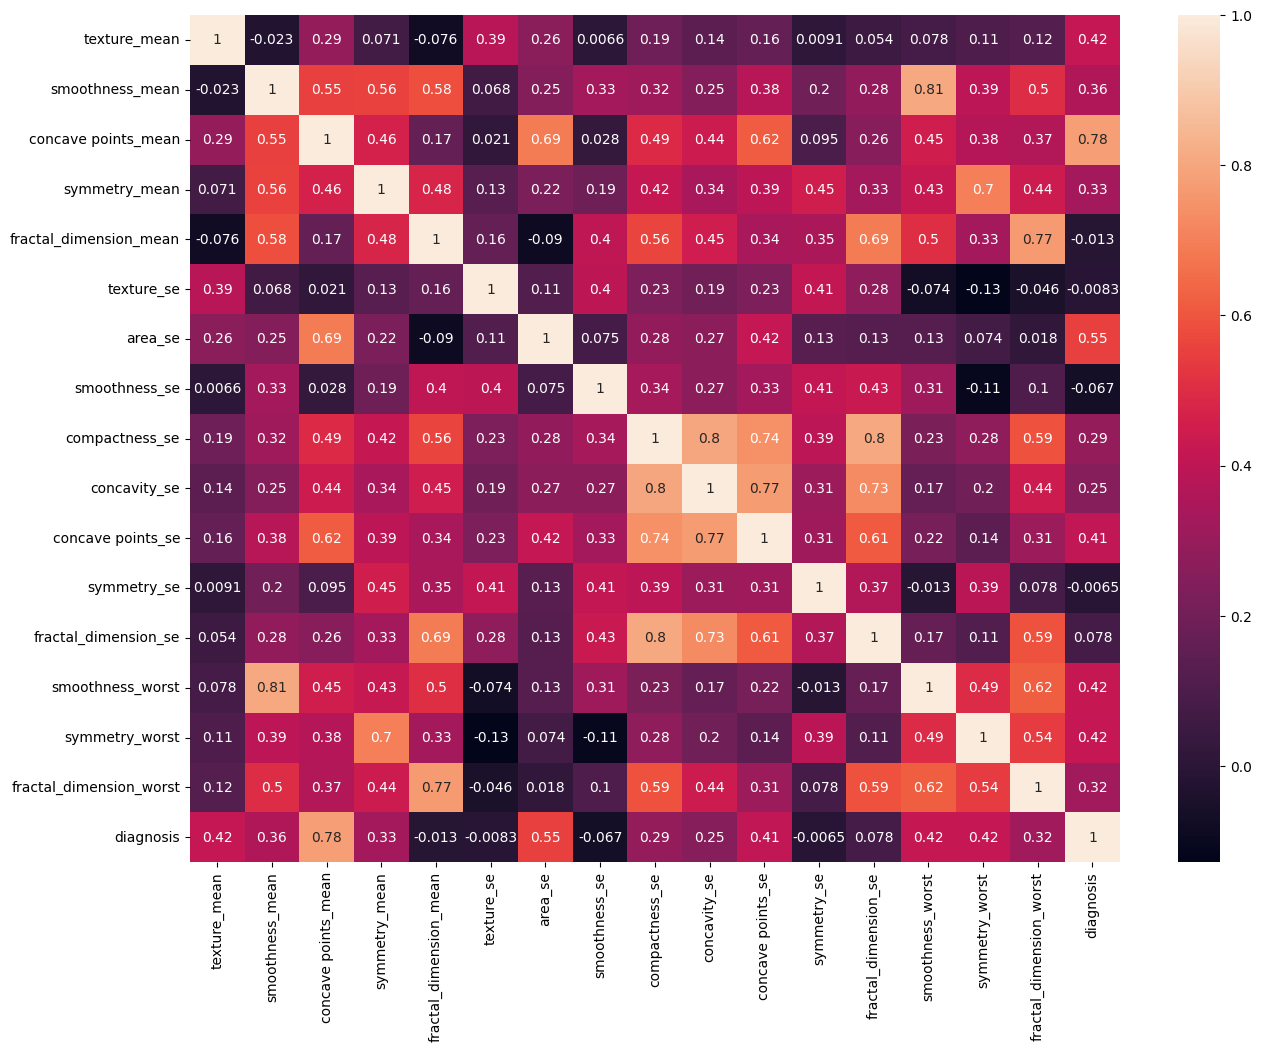

In [9]:
plt.figure(figsize=(15,11))
sns.heatmap(df.corr(), annot=True)
plt.show()

Above is a heatmap of all features. Below is a pairplot with KDE. The pairplot shows the visual representation of how Malignant tumours compare to Benign tumours in each category.

<Figure size 1000x700 with 0 Axes>

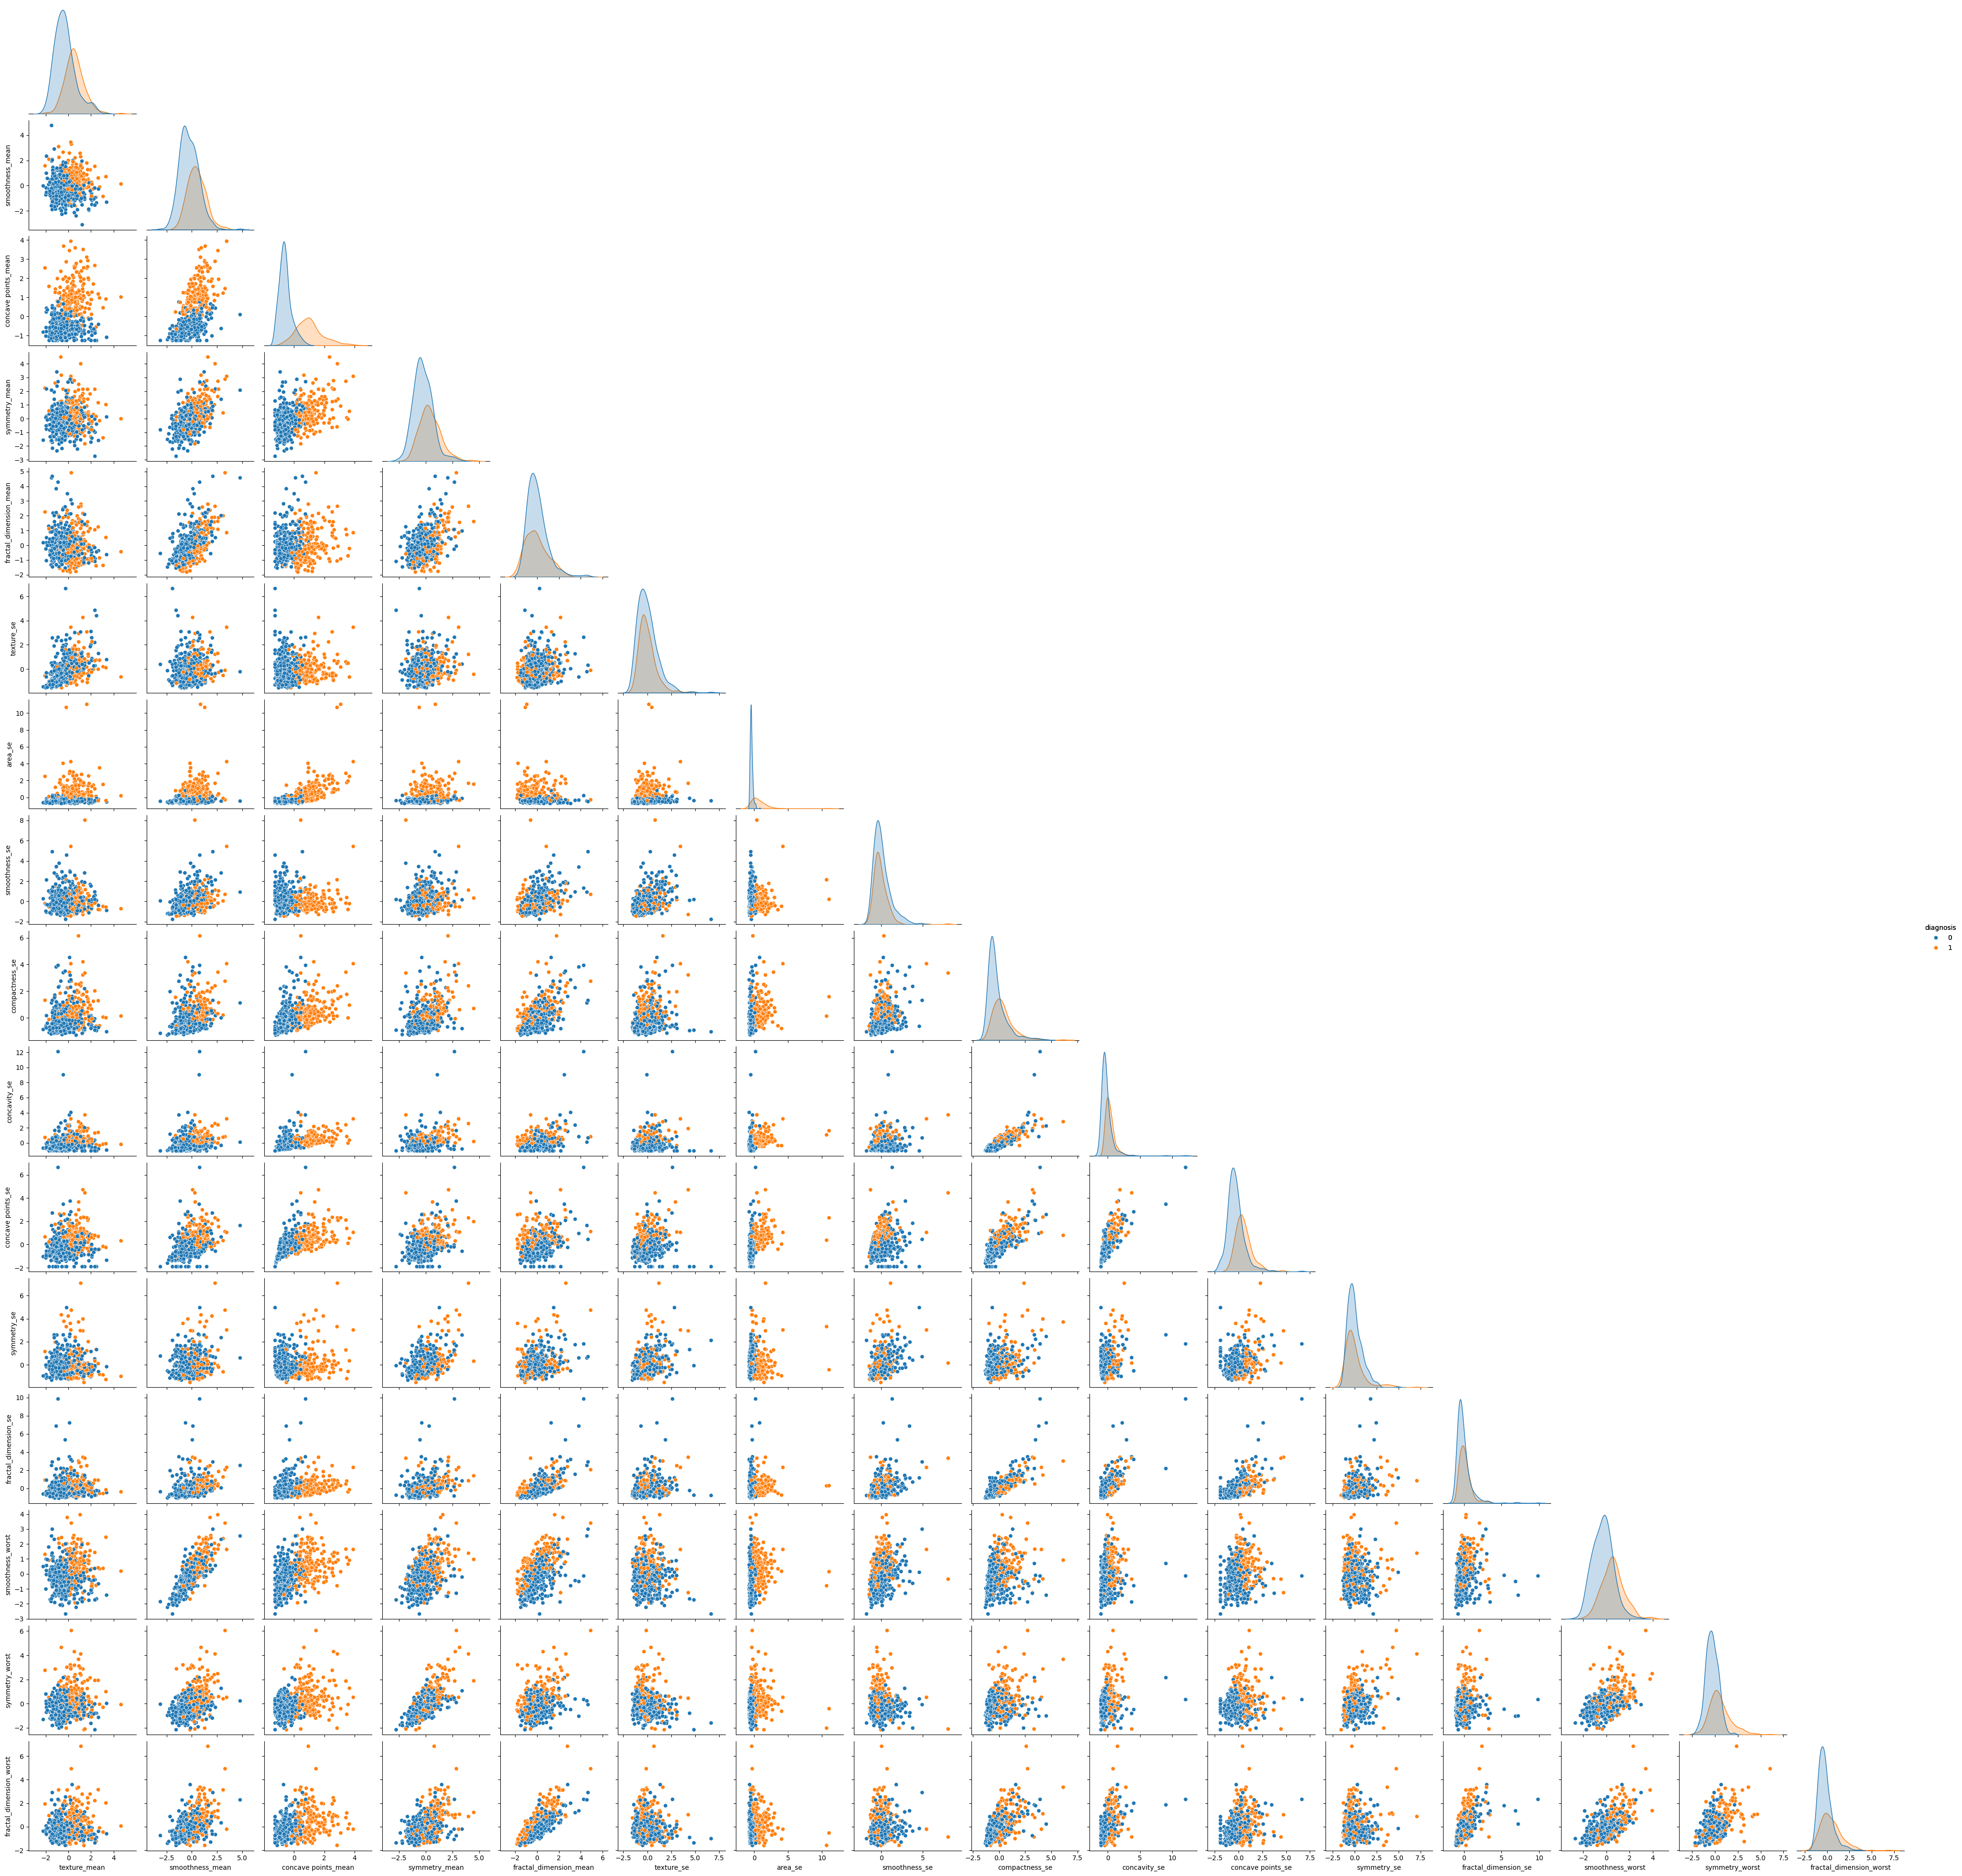

In [10]:
plt.figure(figsize=(10,7))
g = sns.pairplot(df, hue='diagnosis', diag_kind='kde', corner=True)
g.add_legend()
plt.show()

### Task 3

### Logistic Regression Implementation

1. Implementing Logistic Regression

In [1]:
import numpy as np  # Importing NumPy for numerical operations

class LogisticRegression:
    # Initializes the learning rate, number of iterations, and mini-batch size
    def __init__(self, learning_rate=0.001, n_iters=1000, batch_size=32):
        self.lr = learning_rate  # Learning rate for gradient descent
        self.n_iters = n_iters  # Number of training epochs
        self.batch_size = batch_size  # Size of each mini-batch
        self.weights = None  # Placeholder for weights
        self.bias = None  # Placeholder for bias
        self.losses = []  # List to store loss values for each epoch

    # Sigmoid activation function for logistic regression
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    # Computes binary cross-entropy loss
    def compute_loss(self, y_true, y_pred):
        epsilon = 1e-9  # Small value to prevent log(0)
        y1 = y_true * np.log(y_pred + epsilon)
        y2 = (1 - y_true) * np.log(1 - y_pred + epsilon)
        return -np.mean(y1 + y2)  # Return average loss

    # Trains the model using mini-batch gradient descent
    def fit_mini_batch(self, X, y):
        n_samples, n_features = X.shape  # Get number of samples and features
        self.weights = np.zeros(n_features)  # Initialize weights to zeros
        self.bias = 0  # Initialize bias to zero

        # Convert from DataFrame to NumPy array if needed
        if hasattr(X, 'values'):
            X = X.values
        if hasattr(y, 'values'):
            y = y.values

        # Loop over each epoch
        for epoch in range(self.n_iters):
            indices = np.random.permutation(n_samples)  # Shuffle data indices
            X_shuffled = X[indices]  # Shuffle X
            y_shuffled = y[indices]  # Shuffle y

            # Loop over mini-batches
            for i in range(0, n_samples, self.batch_size):
                end_idx = min(i + self.batch_size, n_samples)  # Compute batch end index
                X_batch = X_shuffled[i:end_idx]  # Extract mini-batch X
                y_batch = y_shuffled[i:end_idx]  # Extract mini-batch y
                batch_size_actual = end_idx - i  # Actual batch size (may be smaller at end)

                z = np.dot(X_batch, self.weights) + self.bias  # Compute linear combination
                A = self._sigmoid(z)  # Apply sigmoid to get predictions

                dz = A - y_batch  # Compute prediction error
                dw = (1 / batch_size_actual) * np.dot(X_batch.T, dz)  # Compute gradient w.r.t weights
                db = (1 / batch_size_actual) * np.sum(dz)  # Compute gradient w.r.t bias

                self.weights -= self.lr * dw  # Update weights
                self.bias -= self.lr * db  # Update bias

            # Compute full-dataset predictions and loss after epoch
            z_full = np.dot(X, self.weights) + self.bias
            A_full = self._sigmoid(z_full)
            epoch_loss = self.compute_loss(y, A_full)
            self.losses.append(epoch_loss)  # Store epoch loss

    # Trains the model using stochastic gradient descent (1 sample per update)
    def fit_sgd(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        if hasattr(X, 'values'):
            X = X.values
        if hasattr(y, 'values'):
            y = y.values

        for epoch in range(self.n_iters):
            indices = np.random.permutation(n_samples)  # Shuffle samples each epoch
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(n_samples):
                xi = X_shuffled[i:i+1]  # Select one sample
                yi = y_shuffled[i]  # Select corresponding label

                z = np.dot(xi, self.weights) + self.bias  # Compute linear output
                A = self._sigmoid(z)  # Apply sigmoid

                dz = A - yi  # Compute error
                dw = np.dot(xi.T, dz)  # Gradient of weights
                db = dz  # Gradient of bias

                self.weights -= self.lr * dw.flatten()  # Update weights
                self.bias -= self.lr * db.item()  # Update bias

            # Compute and store loss after each epoch
            z_full = np.dot(X, self.weights) + self.bias
            A_full = self._sigmoid(z_full)
            epoch_loss = self.compute_loss(y, A_full)
            self.losses.append(epoch_loss)

    # Trains the model using full-batch gradient descent
    def fit_batch_gradient(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            z = np.dot(X, self.weights) + self.bias  # Linear combination
            A = self._sigmoid(z)  # Sigmoid activation

            self.losses.append(self.compute_loss(y, A))  # Store loss

            dz = A - y  # Error term
            dw = (1 / n_samples) * np.dot(X.T, dz)  # Gradient w.r.t weights
            db = (1 / n_samples) * np.sum(dz)  # Gradient w.r.t bias

            self.weights -= self.lr * dw  # Update weights
            self.bias -= self.lr * db  # Update bias

    # General fit method using a passed-in optimizer (e.g., Adam, RMSProp)
    def fit_optimizer(self, X, y, optimizer):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            z = np.dot(X, self.weights) + self.bias  # Compute predictions
            A = self._sigmoid(z)

            self.losses.append(self.compute_loss(y, A))  # Store loss

            dz = A - y  # Error
            dw = (1 / n_samples) * np.dot(X.T, dz)  # Gradient w.r.t weights
            db = (1 / n_samples) * np.sum(dz)  # Gradient w.r.t bias

            self.weights, self.bias = optimizer.update(self.weights, self.bias, dw, db)  # Update using optimizer

    # Predicts binary class labels (0 or 1)
    def predict(self, X):
        threshold = 0.5  # Classification threshold
        z = np.dot(X, self.weights) + self.bias  # Linear model output
        y_predicted = self._sigmoid(z)  # Predicted probabilities
        y_predicted_cls = [1 if i > threshold else 0 for i in y_predicted]  # Convert to class labels

        return np.array(y_predicted_cls)  # Return final predictions


In [16]:
X = df.drop('diagnosis', axis=1)  # Drop the target column to get the feature matrix X
y = df['diagnosis']  # Extract the target labels (diagnosis) as y

# Define function to calculate precision: TP / (TP + FP)
def precision(y_true, y_pred):
    true_positives = np.sum((y_pred == 1) & (y_true == 1))  # Correctly predicted positives
    predicted_positives = np.sum(y_pred == 1)  # Total predicted positives
    return true_positives / (predicted_positives + 1e-9)  # Avoid division by zero

# Define function to calculate recall: TP / (TP + FN)
def recall(y_true, y_pred):
    true_positives = np.sum((y_pred == 1) & (y_true == 1))  # Correctly predicted positives
    actual_positives = np.sum(y_true == 1)  # Total actual positives
    return true_positives / (actual_positives + 1e-9)  # Avoid division by zero

# Define function to calculate F1 score: harmonic mean of precision and recall
def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)  # Compute precision
    r = recall(y_true, y_pred)  # Compute recall
    return 2 * (p * r) / (p + r + 1e-9)  # F1 formula with small constant for stability

# Train using batch gradient descent
regressor = LogisticRegression()  # Create new LogisticRegression instance
regressor.fit_batch_gradient(X, y)  # Train model with full-batch gradient descent
predictions = regressor.predict(X)  # Predict labels on training data

# Print evaluation metrics for batch gradient
print("Precision:", precision(y, predictions))
print("Recall:", recall(y, predictions))
print("F1 Score:", f1_score(y, predictions))

# Train using stochastic gradient descent (SGD)
regressor = LogisticRegression()  # Create new LogisticRegression instance
regressor.fit_sgd(X, y)  # Train model with SGD (1 sample at a time)
predictions = regressor.predict(X)  # Predict labels on training data

# Print evaluation metrics for SGD
print("Precision:", precision(y, predictions))
print("Recall:", recall(y, predictions))
print("F1 Score:", f1_score(y, predictions))

# Train using mini-batch gradient descent
regressor = LogisticRegression()  # Create new LogisticRegression instance
regressor.fit_mini_batch(X, y)  # Train model using mini-batches
predictions = regressor.predict(X)  # Predict labels on training data

# Print evaluation metrics for mini-batch gradient
print("Precision:", precision(y, predictions))
print("Recall:", recall(y, predictions))
print("F1 Score:", f1_score(y, predictions))


Precision: 0.8685446009348895
Recall: 0.8726415094298461
F1 Score: 0.8705882347900236
Precision: 0.995121951214658
Recall: 0.9622641509388573
F1 Score: 0.9784172656824986
Precision: 0.9849246231106286
Recall: 0.9245283018824315
F1 Score: 0.9537712890335719


2.

With respect to my cost function, the batch gradient descent is going to be the most smooth curve but it is also slower as it has to do a full pass through all the data. With the stochastic gradient descent, it will tend to have a much faster convergence but it has the possibility of oscillating if it overshoots the minimum. The mini-batch gradient descent is a solid medium between the two as it's less noisy than the stochastic gradient descent but it's faster that the batch gradient descent.

---
### Task 4

1. Implementing Optimization Algorithms




In [17]:
class Momentum:
    # Initialize learning rate (lr), momentum coefficient (beta), and velocity terms for weights and bias
    def __init__(self, lr=0.01, beta=0.9):
        self.lr = lr  # Learning rate
        self.beta = beta  # Momentum coefficient (controls exponential decay)
        self.v_w = 0  # Velocity for weight updates
        self.v_b = 0  # Velocity for bias updates

    # Update function to apply momentum-based gradient update
    def update(self, w, b, dw, db):
        # Update velocity for weights using exponential moving average of gradients
        self.v_w = self.beta * self.v_w + (1 - self.beta) * dw
        # Update velocity for bias using exponential moving average of gradients
        self.v_b = self.beta * self.v_b + (1 - self.beta) * db

        # Update weights and bias using the momentum-adjusted velocities
        w -= self.lr * self.v_w
        b -= self.lr * self.v_b

        return w, b  # Return updated weights and bias


In [18]:
class RMSProp:
    # Initialize learning rate, decay rate (beta), and a small epsilon for numerical stability
    def __init__(self, lr=0.01, beta=0.9, epsilon=1e-8):
        self.lr = lr  # Learning rate
        self.beta = beta  # Decay rate for the moving average of squared gradients
        self.epsilon = epsilon  # Small value to prevent division by zero
        self.s_w = 0  # Running average of squared gradients for weights
        self.s_b = 0  # Running average of squared gradients for bias

    # Update function using RMSProp algorithm
    def update(self, w, b, dw, db):
        # Update the running average of squared gradients for weights
        self.s_w = self.beta * self.s_w + (1 - self.beta) * (dw ** 2)
        # Update the running average of squared gradients for bias
        self.s_b = self.beta * self.s_b + (1 - self.beta) * (db ** 2)

        # Update weights using adaptive learning rate
        w -= self.lr * dw / (np.sqrt(self.s_w) + self.epsilon)
        # Update bias using adaptive learning rate
        b -= self.lr * db / (np.sqrt(self.s_b) + self.epsilon)

        return w, b  # Return updated weights and bias


In [19]:
class Adam:
    # Initialize learning rate, exponential decay rates for moment estimates, epsilon, and moment variables
    def __init__(self, lr=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.lr = lr  # Learning rate
        self.beta1 = beta1  # Decay rate for the first moment (mean)
        self.beta2 = beta2  # Decay rate for the second moment (uncentered variance)
        self.epsilon = epsilon  # Small value to prevent division by zero
        self.m_w = 0  # First moment estimate (mean) for weights
        self.v_w = 0  # Second moment estimate (variance) for weights
        self.m_b = 0  # First moment estimate for bias
        self.v_b = 0  # Second moment estimate for bias
        self.t = 0  # Time step for bias correction

    # Update function to apply the Adam optimization algorithm
    def update(self, w, b, dw, db):
        self.t += 1  # Increment time step

        # Update biased first moment estimate for weights
        self.m_w = self.beta1 * self.m_w + (1 - self.beta1) * dw
        # Update biased second moment estimate for weights
        self.v_w = self.beta2 * self.v_w + (1 - self.beta2) * (dw ** 2)

        # Update biased first moment estimate for bias
        self.m_b = self.beta1 * self.m_b + (1 - self.beta1) * db
        # Update biased second moment estimate for bias
        self.v_b = self.beta2 * self.v_b + (1 - self.beta2) * (db ** 2)

        # Compute bias-corrected first moment estimate for weights
        m_w_hat = self.m_w / (1 - self.beta1 ** self.t)
        # Compute bias-corrected second moment estimate for weights
        v_w_hat = self.v_w / (1 - self.beta2 ** self.t)

        # Compute bias-corrected first moment estimate for bias
        m_b_hat = self.m_b / (1 - self.beta1 ** self.t)
        # Compute bias-corrected second moment estimate for bias
        v_b_hat = self.v_b / (1 - self.beta2 ** self.t)

        # Update weights using bias-corrected moment estimates
        w -= self.lr * m_w_hat / (np.sqrt(v_w_hat) + self.epsilon)
        # Update bias using bias-corrected moment estimates
        b -= self.lr * m_b_hat / (np.sqrt(v_b_hat) + self.epsilon)

        return w, b  # Return updated weights and bias


1. Testing the stochastic gradient descent, it can be seen that there is about a 98% accuracy for this model.

Note: It also takes a while to run which is confusing as it should be a faster model in comparison to the batch gradient descent implemented above.

In [20]:
regressor = LogisticRegression()
regressor.fit_sgd(X, y)
predictions = regressor.predict(X)
print("Precision:", precision(y, predictions))
print("Recall:", recall(y, predictions))
print("F1 Score:", f1_score(y, predictions))

Precision: 0.995121951214658
Recall: 0.9622641509388573
F1 Score: 0.9784172656824986


In comparison to the Momentum optimization, the Stochastic approach appears to generally be more accurate.

In [21]:
momentum = Momentum()
regressor = LogisticRegression()
regressor.fit_optimizer(X, y, momentum)
predictions = regressor.predict(X)
print("Precision:", precision(y, predictions))
print("Recall:", recall(y, predictions))
print("F1 Score:", f1_score(y, predictions))

Precision: 0.965174129348432
Recall: 0.9150943396183251
F1 Score: 0.9394673118444736


In comparison to the RMS Prop, stocahstic appears to About the same accuracy, slightly better when measured using precision testing and less accurate when using recall testing. This means that the stochastic approach is better at predicting positive results than negative results in comparison to RMS Prop.

In [22]:
rms = RMSProp()
regressor = LogisticRegression()
regressor.fit_optimizer(X, y, rms)
predictions = regressor.predict(X)
print("Precision:", precision(y, predictions))
print("Recall:", recall(y, predictions))
print("F1 Score:", f1_score(y, predictions))

Precision: 0.9810426540237865
Recall: 0.9764150943350169
F1 Score: 0.9787234037506943


In comparison to the Adam Optimization algorithm, Stochastic overall performs better.

In [23]:
adam = Adam()
regressor = LogisticRegression()
regressor.fit_optimizer(X, y, adam)
predictions = regressor.predict(X)
print("Precision:", precision(y, predictions))
print("Recall:", recall(y, predictions))
print("F1 Score:", f1_score(y, predictions))

Precision: 0.98536585365373
Recall: 0.9528301886747509
F1 Score: 0.9688249395434559


### Batch Gradient Descent

### Pros

- It are that it converges smoothly to the minimum and it's easy to implement.

### Cons

- It's slow on larger data sets and needs the entire data set for each iteration

### Stochastic Gradient Descent

### Pros

- It updates fast, introduces some randomess that helps escape local minima and is good for larger datasets

### Cons

- It does not convergy smoothly at all, the learning rate needs to be tuned for the data set, and it can also oscillate by accidentally overshooting the minimum.


### Mini-Batch Gradient Descent

### Pros

-It is a good medium between Stochastic and Batch as it is less noisy than the Stochastic but is faster than the Batch

### Cons

- It needs fine tunings and can still be suboptimal when compared to other techniques.

### Momentum

### Pros

- It helps accelerate Stochastic in the right direction and it dampens oscillations to make it quicker.

### Cons

- Needs lots of tuning to get the right coefficient and can still overshoot if the coefficient is too high.

### RMSProp

### Pros

- It adapts the learning rate for each parameter and prevents vanishing learning rate with the decay average of squared gradient.

### Cons

- The decay rate and learning rate need to be tuned.

### Adam

### Pros

- It combines Momentum and RMSProp in that it has a adaptive learning rate and also has a momentum regulator to not overshoot.

### Cons

- It tended to generalize worse than SGD.

### Sources

https://www.sciencedirect.com/science/article/abs/pii/0041555364901375?via%3Dihub

https://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf

https://arxiv.org/pdf/1609.04747

https://www.geeksforgeeks.org/hyperparameter-tuning/

https://medium.com/@abelkuriakose/a-guide-to-hyperparameter-tuning-enhancing-machine-learning-models-69dc9e0f02ea

